<a href="https://colab.research.google.com/github/Vignesh424/Pokemon-DataScience/blob/main/Pokemon_Stat_Analysis_with_Multiple_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#read the data
dataset=pd.read_csv("/content/pokedex_(Update_05.20).csv")

In [ ]:
#null values
dataset.isnull().sum()
dataset.isnull().any()

Unnamed: 0          False
pokedex_number      False
name                False
german_name          True
japanese_name        True
generation          False
status              False
species             False
type_number         False
type_1              False
type_2               True
height_m            False
weight_kg            True
abilities_number    False
ability_1            True
ability_2            True
ability_hidden       True
total_points        False
hp                  False
attack              False
defense             False
sp_attack           False
sp_defense          False
speed               False
catch_rate           True
base_friendship      True
base_experience      True
growth_rate          True
egg_type_number     False
egg_type_1           True
egg_type_2           True
percentage_male      True
egg_cycles           True
against_normal      False
against_fire        False
against_water       False
against_electric    False
against_grass       False
against_ice 

In [ ]:
#data description
dataset.describe()

,Unnamed: 0,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,egg_type_number,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,924.000000,924.000000,924.000000,1028.000000,792.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,513.500000,437.711089,4.034047,1.527237,1.368093,69.753749,2.284047,437.571984,69.577821,80.119650,74.475681,72.732490,72.132296,68.534047,93.172078,64.139610,153.814935,1.271401,55.003157,30.316456,0.868434,1.125486,1.053502,1.034290,1.004134,1.196498,1.078794,0.952335,1.084630,1.166342,0.979329,0.992461,1.239786,1.010700,0.975681,1.065661,0.980302,1.084874
std,296.902341,259.366480,2.234937,0.499501,3.380126,129.221230,0.794981,121.664910,26.385849,32.372321,31.303309,32.677698,28.083684,29.802103,75.240630,21.455464,79.270628,0.451417,20.182675,28.942912,0.286236,0.717742,0.613411,0.645167,0.748527,0.759471,0.754969,0.542982,0.784937,0.593030,0.499146,0.598301,0.699156,0.558533,0.377549,0.451054,0.503434,0.527743
min,0.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000,36.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,256.750000,213.750000,2.000000,1.000000,0.600000,8.800000,2.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,70.000000,67.000000,1.000000,50.000000,20.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,513.500000,433.500000,4.000000,2.000000,1.000000,28.500000,2.000000,455.000000,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000,60.000000,70.000000,159.000000,1.000000,50.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,770.250000,663.250000,6.000000,2.000000,1.500000,69.100000,3.000000,510.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,70.000000,201.500000,2.000000,50.000000,25.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.625000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1027.000000,890.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000,255.000000,140.000000,608.000000,2.000000,100.000000,120.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


In [ ]:
#first 5 printing
dataset.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318,45,49,49,65,65,45,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405,60,62,63,80,80,60,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525,80,82,83,100,100,80,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625,80,100,123,122,120,80,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309,39,52,43,60,50,65,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [ ]:
dataset.index

RangeIndex(start=0, stop=1028, step=1)

In [ ]:
#data = data.fillna(method='ffill')
dataset=dataset.drop("Unnamed: 0" ,axis=1)
dataset.head()

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318,45,49,49,65,65,45,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405,60,62,63,80,80,60,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525,80,82,83,100,100,80,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625,80,100,123,122,120,80,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309,39,52,43,60,50,65,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [ ]:
#delete column and save as a new 
pokedex=dataset.drop(columns=['pokedex_number', 'german_name', 'abilities_number','height_m', 'weight_kg', 
                   'growth_rate','japanese_name', 'base_friendship', 'catch_rate','egg_type_number', 'ability_1',
                   'ability_2',  'ability_hidden','egg_type_1', 'egg_type_2', 'percentage_male','egg_cycles' ,
                   'against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass',
                   'against_ice', 'against_fight', 'against_poison', 'against_ground', 'against_flying',
                   'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
                   'against_dark', 'against_steel', 'against_fairy'])

In [ ]:
#print first 5 of new
pokedex.head()

,name,generation,status,species,type_number,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed,base_experience
0,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,318,45,49,49,65,65,45,64.0
1,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,405,60,62,63,80,80,60,142.0
2,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,525,80,82,83,100,100,80,236.0
3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,625,80,100,123,122,120,80,281.0
4,Charmander,1,Normal,Lizard Pokémon,1,Fire,NaN,309,39,52,43,60,50,65,62.0


In [ ]:
#new_data description
pokedex.describe()

,generation,type_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,base_experience
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,924.000000
mean,4.034047,1.527237,437.571984,69.577821,80.119650,74.475681,72.732490,72.132296,68.534047,153.814935
std,2.234937,0.499501,121.664910,26.385849,32.372321,31.303309,32.677698,28.083684,29.802103,79.270628
min,1.000000,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,36.000000
25%,2.000000,1.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,67.000000
50%,4.000000,2.000000,455.000000,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000,159.000000
75%,6.000000,2.000000,510.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,201.500000
max,8.000000,2.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000,608.000000


In [ ]:
# Return the dtypes in the DataFrame.
pokedex.dtypes

name                object
generation           int64
status              object
species             object
type_number          int64
type_1              object
type_2              object
total_points         int64
hp                   int64
attack               int64
defense              int64
sp_attack            int64
sp_defense           int64
speed                int64
base_experience    float64
dtype: object

**1.** **What are the different pokemons across generations?**

We'll start by taking a look at the total number of Pokemon in each generation.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


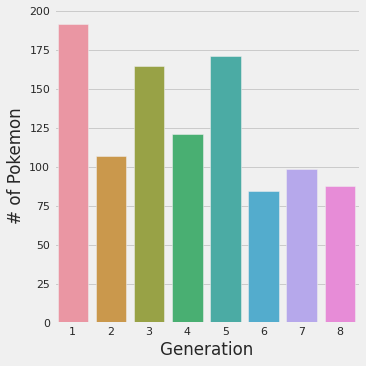

In [ ]:
sns.factorplot(
    x='generation', 
    data=pokedex, 
    kind='count'
).set_axis_labels('Generation', '# of Pokemon');

There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.

Let's dig a bit deeper and examine the distribution of primary and secondary types of Pokemon across generations.

2. **Using a Trellis chart, We find distribution of primary and secondary types of Pokemon across generations.**



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


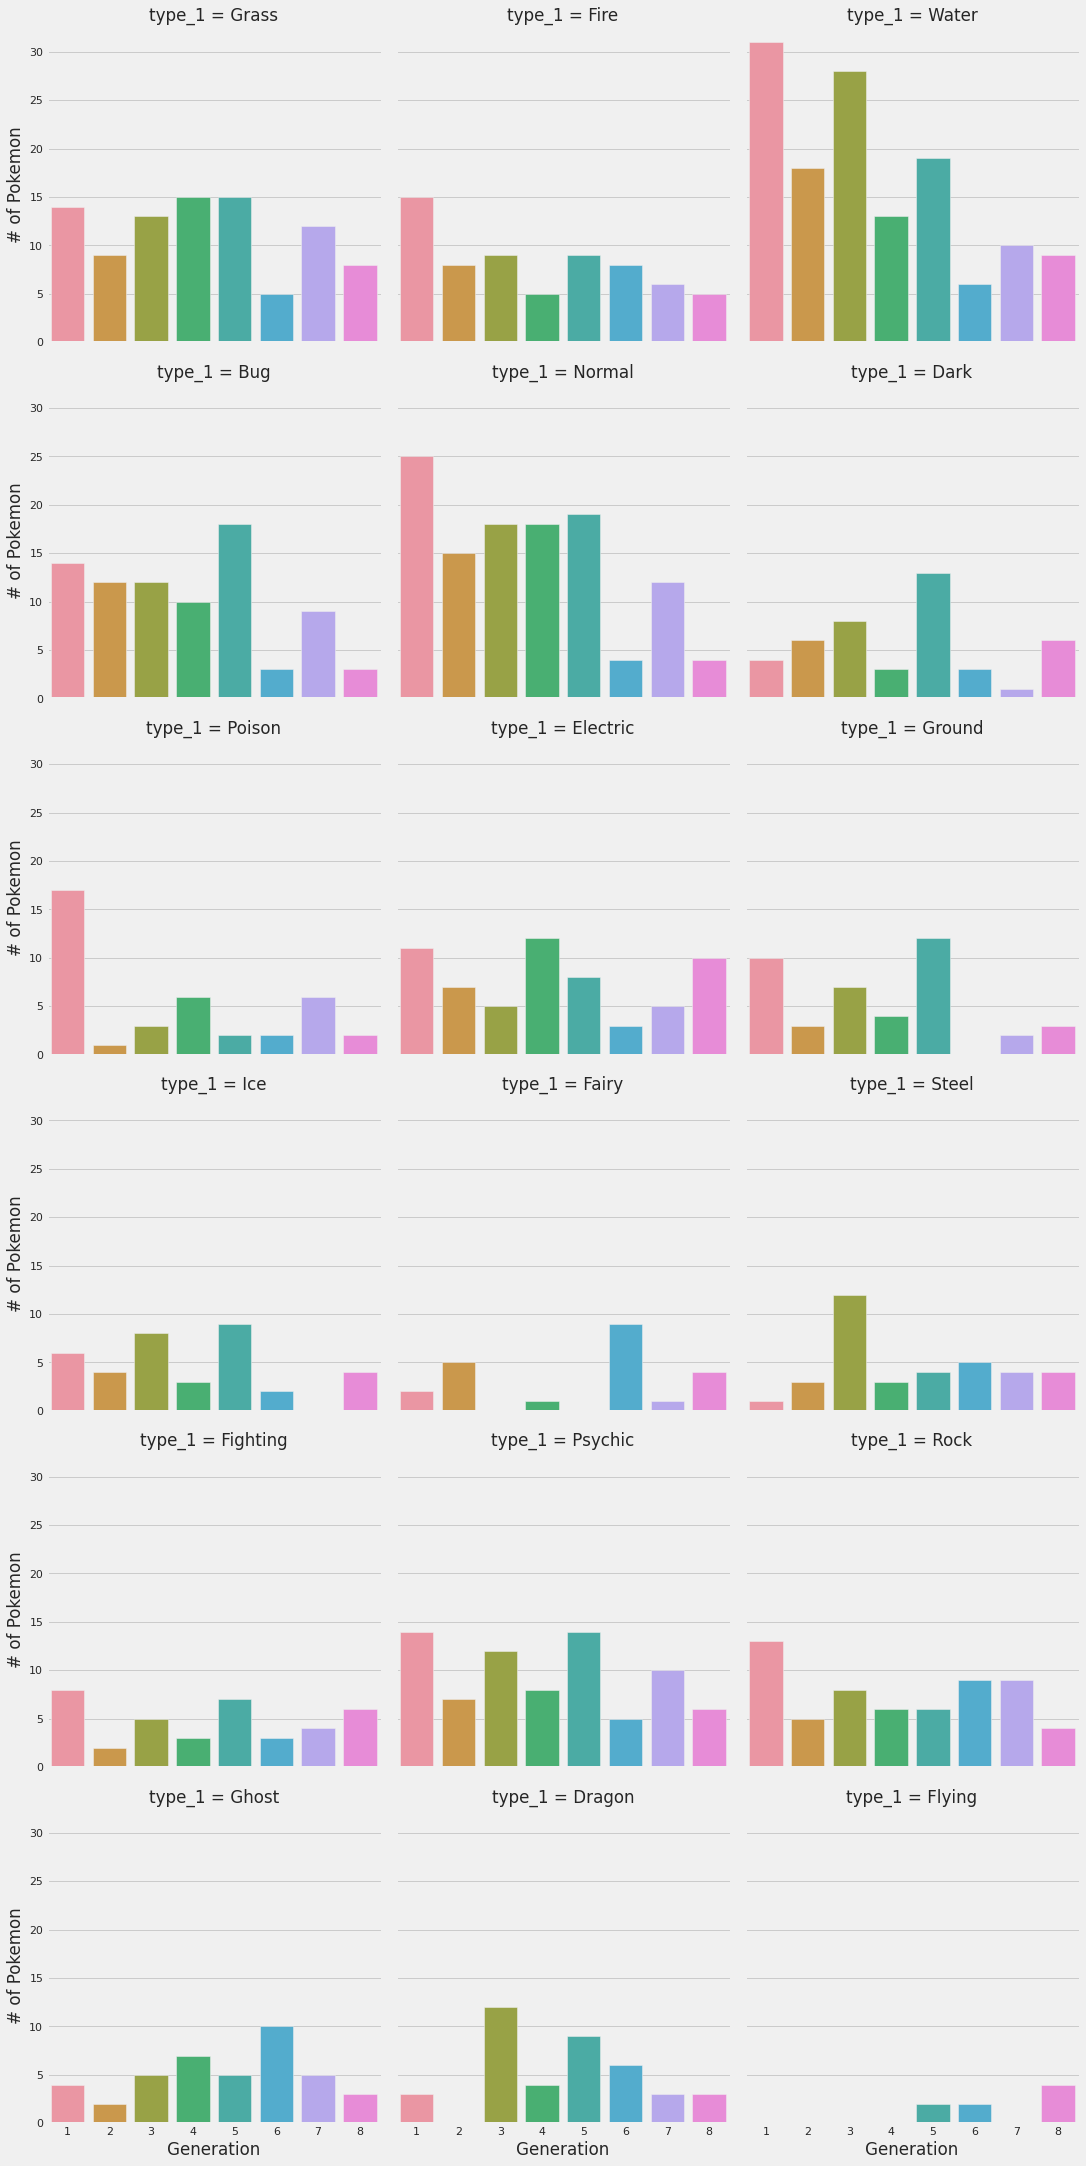

In [ ]:
sns.factorplot(
    x='generation',
    data=pokedex,
    col='type_1',
    kind='count',
    col_wrap=3
).set_axis_labels('Generation', '# of Pokemon');


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


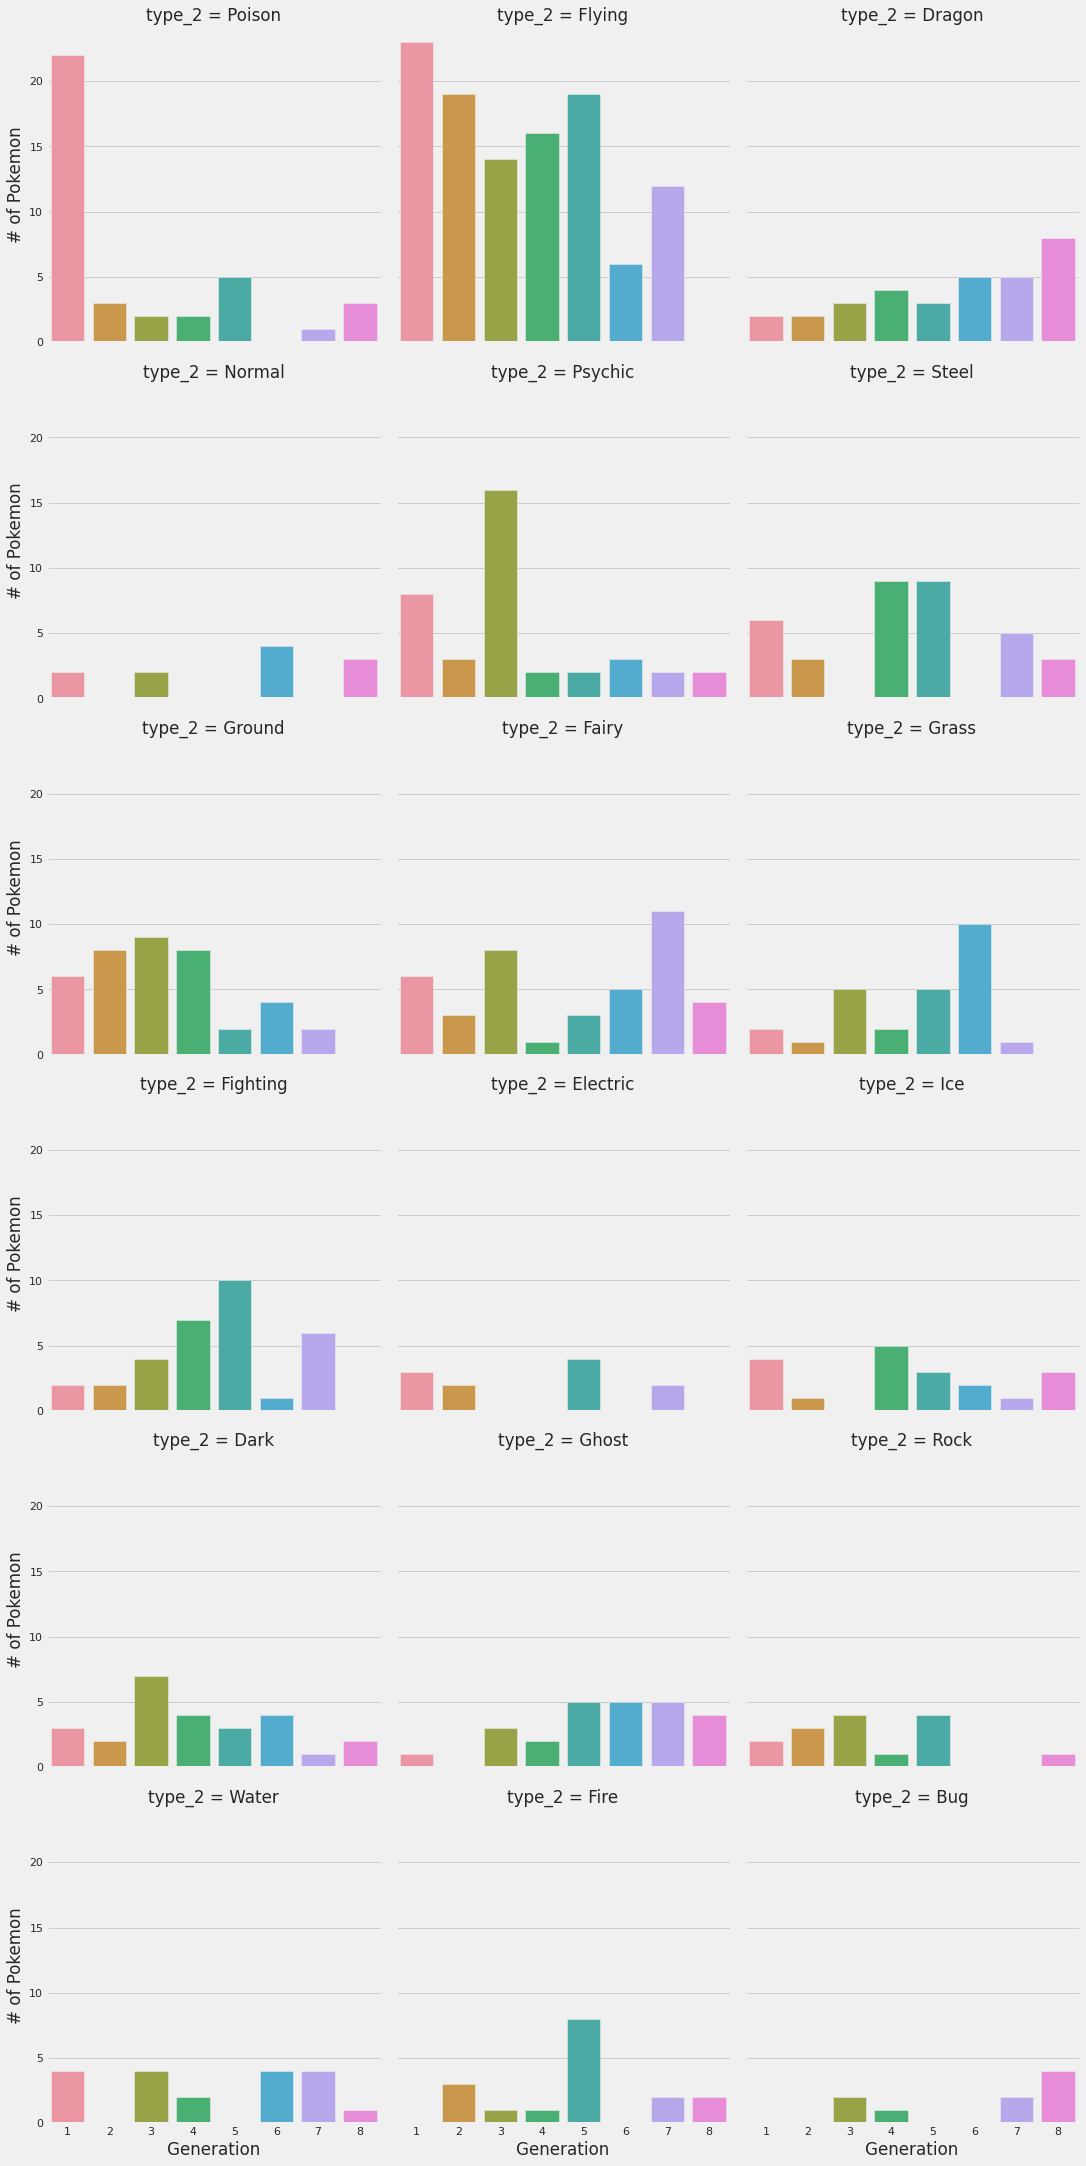

In [ ]:
sns.factorplot(
    x='generation',
    data=pokedex,
    col='type_2',
    kind='count',
    col_wrap=3
).set_axis_labels('Generation', '# of Pokemon');


3. **Finding Pokemon Types**

In [ ]:
type_1= pokedex['type_1'].unique()
type_2= pokedex['type_2'].unique()
print('Type 1 count: {}'.format(len(type_1)))  #nunique()
print('Type 2 count: {}'.format(len(type_2)))

Type 1 count: 18
Type 2 count: 19


There are a total of 18 primary types and 19 secondary types (again, the additional secondary type refers to Pokemon species without a secondary type).

We will create custom color palettes to indicate the types easily.

4. **Determining the most common primary and secondary type distributions.** 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


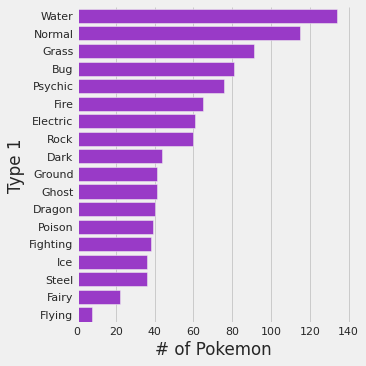

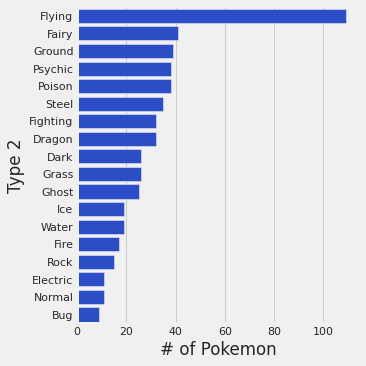

In [ ]:
sns.factorplot(
    y='type_1',
    data=pokedex,
    kind='count',
    order=pokedex['type_1'].value_counts().index,
    aspect=1,
    color= '#a123de'
).set_axis_labels('# of Pokemon', 'Type 1')

sns.factorplot(
    y='type_2',
    data=pokedex,
    kind='count',
    order=pokedex['type_2'].value_counts().index,
    aspect=1,
    color='#123edf'
).set_axis_labels('# of Pokemon', 'Type 2');

5. **What are the most common combinations of primary and secondary type of pokemon?**

For finding the combinations, we need Type 2 also. So, we will select those cells in Type 2 not equal to None and create a heatmap.

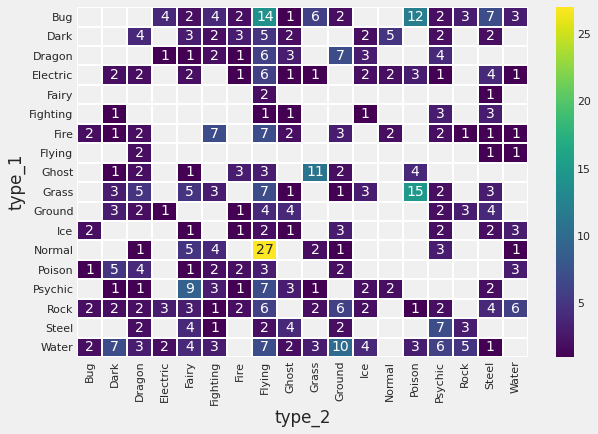

In [ ]:
most_common = pokedex[pokedex['type_2'] != 'NaN']
dims = (9, 6) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(most_common.groupby(['type_1', 'type_2']).size().unstack(),linewidths=1,annot=True, cmap='viridis');

6. **Examining the Base Stat Analysis Correlation.**

Using a Correlation Matrix, we will examine the correlation between the base stats of Pokemon.

[Text(0.5, 1.0, 'HeatMap to show Correlation between Base Stats')]

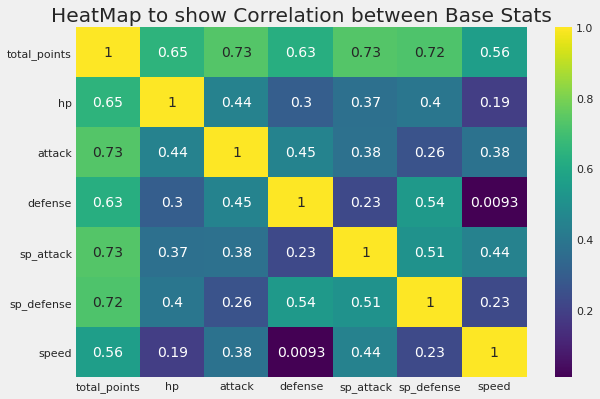

In [ ]:
Corr = pokedex[['total_points' ,'hp', 'attack','defense','sp_attack','sp_defense','speed']]
dims = (9, 6) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
CorrelationMap = sns.heatmap(Corr.corr(),annot = True, cmap='viridis')
CorrelationMap.set(title = 'HeatMap to show Correlation between Base Stats')

We can see that the correlation between attack and total_points is 0.73. So we will use 2D scatterplot also called as the lmplot to see the correlation between total_points and attack.

6. **Correlation of Total_Points and Attack using a Scatterplot**

Text(-1.664999999999992, 0.5, 'Attack')

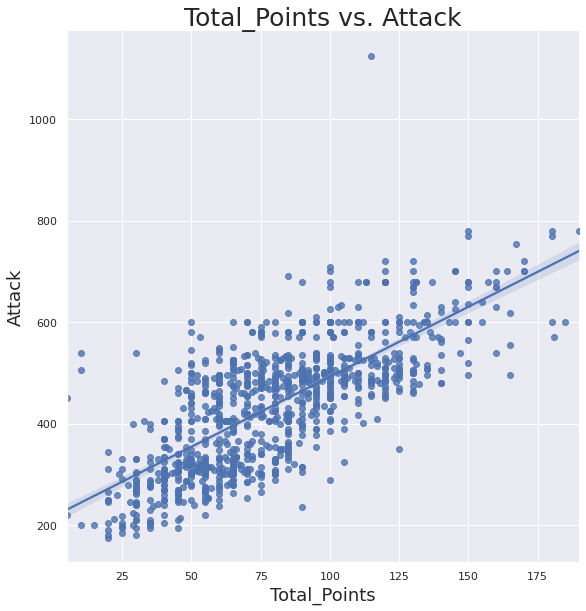

In [ ]:
#Plot the graph
sns.set()
scatter = sns.lmplot(x='attack', y='total_points',data=pokedex,
                   fit_reg = True, height = 8, aspect = 1)
plt.title('Total_Points vs. Attack',fontsize = 25)
plt.xlabel('Total_Points',fontsize = 18)
plt.ylabel('Attack',fontsize = 18)

7. **Distributions Analysis on Attack and Defence.**

For distributions, we use Histograms. Here, to compare it with 2 variables, we used stacked dual axis histograms with kde to see the skeweness.

[Text(0.5, 0, 'Defense:y , Attack:b'),
 Text(0.5, 1.0, 'Distribution of Defense and Attack')]

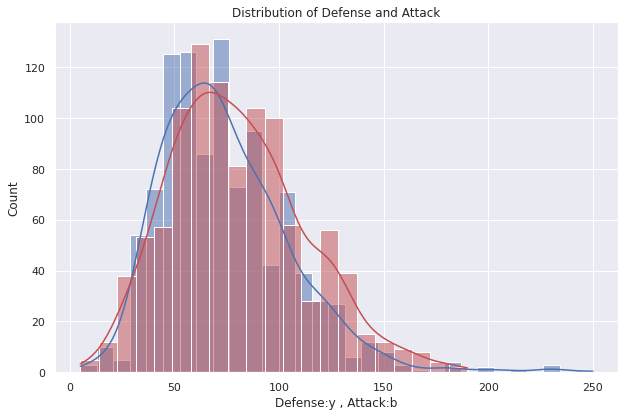

In [ ]:
dims = (9,6)
fig, ax = plt.subplots(figsize=dims)
Dhist = sns.histplot(pokedex['defense'],color='b',kde=True)
Ahist = sns.histplot(pokedex['attack'],color = 'r',kde=True)
Ahist.set(title = 'Distribution of Defense and Attack', xlabel = 'Defense:y , Attack:b')

Conclusion: Here, the distribution of both attributes are also similar. Also a positive skew is seen. We can see that there is a significant tail end to the Defense stat as opposed to the Attack stat, portraying that the Defense stat has more Pokemon with high Defense stats than Attack. You could argue that the Defense stat has a higher variance than the Attack stat.

8. **What the top 10 pokemons?**

In [ ]:
top_pokemon = pokedex.sort_values('total_points', ascending=False).head(10)
top_pokemon

,name,generation,status,species,type_number,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed,base_experience
1027,Eternatus Eternamax,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,1125,255,115,250,125,250,130,NaN
190,Mega Mewtwo Y,1,Legendary,Genetic Pokémon,1,Psychic,NaN,780,106,150,70,194,120,140,351.0
189,Mega Mewtwo X,1,Legendary,Genetic Pokémon,2,Psychic,Fighting,780,106,190,100,154,100,130,351.0
458,Mega Rayquaza,3,Legendary,Sky High Pokémon,2,Dragon,Flying,780,105,180,100,180,100,115,351.0
456,Primal Groudon,3,Legendary,Continent Pokémon,2,Ground,Fire,770,100,180,160,150,90,90,347.0
454,Primal Kyogre,3,Legendary,Sea Basin Pokémon,1,Water,NaN,770,100,150,90,180,160,90,347.0
930,Ultra Necrozma,7,Legendary,Prism Pokémon,2,Psychic,Dragon,754,97,167,97,167,97,129,339.0
1024,Zamazenta Crowned Shield,8,Legendary,Warrior Pokémon,2,Fighting,Steel,720,92,130,145,80,145,128,NaN
584,Arceus,4,Mythical,Alpha Pokémon,1,Normal,NaN,720,120,120,120,120,120,120,324.0
1022,Zacian Crowned Sword,8,Legendary,Warrior Pokémon,2,Fairy,Steel,720,92,170,115,80,115,148,NaN


9. **Find the legendary and mythical count from the top pokemon**

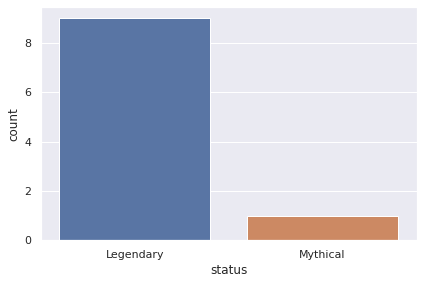

In [ ]:
sns.countplot(x='status', data=top_pokemon);

10. **Finding the Strongest Pokemon with Primary and Secondary types.**

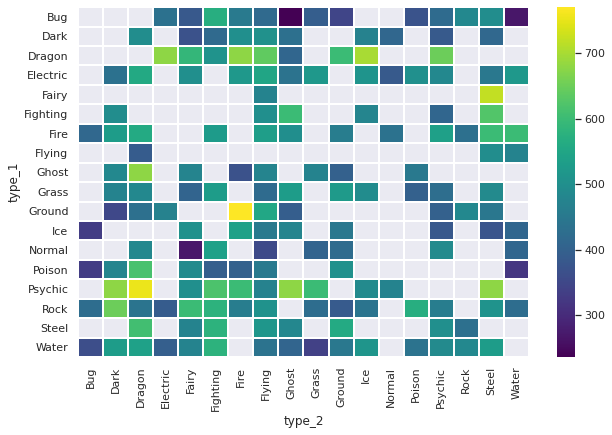

In [ ]:
dims = (9, 6) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
medians = pokedex.groupby(['type_1', 'type_2']).median().unstack().loc[:,'total_points']
sns.heatmap(medians, linewidths=1, cmap='viridis');

We come to a conclusion that Dragon pokemons are really good. They are strong.

Validation of the Algorithm. We will use **Multiple Linear Regression.** 

**Preparing the Data**


We want to predict the total points depending upon the attack. Therefore our attribute set will consist of the "Total_Points" column, and the label will be the "Attack" column.

In [ ]:
X = pokedex[['hp','attack','defense','sp_attack', 'sp_defense', 'speed']]

y = pokedex['total_points']

In [ ]:
X

,hp,attack,defense,sp_attack,sp_defense,speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
1023,92,130,115,80,115,138
1024,92,130,145,80,145,128
1025,92,130,115,80,115,138
1026,140,85,95,145,95,130


In [ ]:
y

0        318
1        405
2        525
3        625
4        309
        ... 
1023     670
1024     720
1025     670
1026     690
1027    1125
Name: total_points, Length: 1028, dtype: int64

In [ ]:
#import packages for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train, y_train)

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

2.2737367544323206e-13
[1. 1. 1. 1. 1. 1.]


In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
hp,1.0
attack,1.0
defense,1.0
sp_attack,1.0
sp_defense,1.0
speed,1.0


This means that for every one unit of change in Attack, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

**Making Predictions**

In [ ]:
y_pred = regressor.predict(X_test)

The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

To compare the actual output values for X_test with the predicted values, execute the following manner.

In [ ]:
df = pd.DataFrame.from_records({'Actual':y_test,'Predicted':y_pred })
print(df)

      Actual  Predicted
422      460      460.0
715      495      495.0
632      310      310.0
45       505      505.0
386      470      470.0
...      ...        ...
412      420      420.0
479      384      384.0
1023     670      670.0
62       450      450.0
79       385      385.0

[257 rows x 2 columns]


Though our model is not very precise, the predicted percentages are close to the actual ones.

**Evaluating the Algorithm**

The final step is to evaluate the performance of algorithm.

This step is particularly important to compare how well different algorithms perform on a particular dataset.

For regression algorithms, three evaluation metrics are

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error


In [ ]:
from sklearn import metrics
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.06840534355303e-14
Mean Squared Error: 1.490489141813008e-26
Root Mean Squared Error: 1.220855905425783e-13


Our Algorithm did a good job.